# Import Modules

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime,date,timedelta
warnings.filterwarnings('ignore')
from sklearn.cluster import hierarchical,linkage_tree
%matplotlib inline

# Import Data

In [2]:
cust = pd.read_excel('Online Retail.xlsx')

In [3]:
cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#Checking for the count of rows with null values
cust.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#Dropping all the rows that contains NA
cust.dropna(axis = 0,inplace=True)

In [7]:
cust.shape

(406829, 8)

In [8]:
cust['Totalprice'] = cust.Quantity * cust.UnitPrice

In [9]:
cust.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
Monetary = pd.DataFrame(cust[['CustomerID','Totalprice']].groupby(by = ['CustomerID']).sum())

In [11]:
Monetary.head()

,Totalprice
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [12]:
Frequency = pd.DataFrame(cust[['InvoiceNo','CustomerID']].groupby(by = ['CustomerID']).count())

In [13]:
Frequency.columns = ['Freq']

In [14]:
Frequency.head()

,Freq
CustomerID,
12346.0,2
12347.0,182
12348.0,31
12349.0,73
12350.0,17


**pandas.to_timedelta(arg, unit=None, errors='raise')**

Convert argument to timedelta.

Timedeltas are absolute differences in times, expressed in difference
    units (e.g. days, hours, minutes, seconds). This method converts
    an argument from a recognized timedelta format / value into
    a Timedelta type.


In [15]:
cust['InvoiceDate'].max() + timedelta(1) 

Timestamp('2011-12-10 12:50:00')

In [16]:
Recency = pd.DataFrame(cust['InvoiceDate'].max() + timedelta(1) - cust[['InvoiceDate','CustomerID']].groupby(by = ['CustomerID']).max()) 

In [17]:
Recency.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   InvoiceDate  4372 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 68.3 KB


In [18]:
Recency.columns = ['LastPurchase']

In [19]:
Recency.head()

,LastPurchase
CustomerID,
12346.0,326 days 02:33:00
12347.0,2 days 20:58:00
12348.0,75 days 23:37:00
12349.0,19 days 02:59:00
12350.0,310 days 20:49:00


In [20]:
Recency['LastPurchase'] = pd.to_timedelta(Recency['LastPurchase'], errors='coerce').dt.days

In [21]:
retail = pd.concat([Recency,Frequency,Monetary],axis=1)

In [22]:
retail.reset_index(inplace=True)

In [23]:
retail.head()

,CustomerID,LastPurchase,Freq,Totalprice
0,12346.0,326,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [24]:
retail['CustomerID'] = retail['CustomerID'].astype('int64').astype('category')

In [25]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   CustomerID    4372 non-null   category
 1   LastPurchase  4372 non-null   int64   
 2   Freq          4372 non-null   int64   
 3   Totalprice    4372 non-null   float64 
dtypes: category(1), float64(1), int64(2)
memory usage: 305.3 KB


# Visualization

As we can observe from the below plots there are various outlier in the each column ,since K-means clustering is sensititve to outliers (**Which are greater than Q3+(1.5)* InterQuartile Range or less than Q1-(1.5)* InterquartileRange**) ,we need to remove those data points.

Text(0.5, 1.0, 'Box plot for Last Purchase')

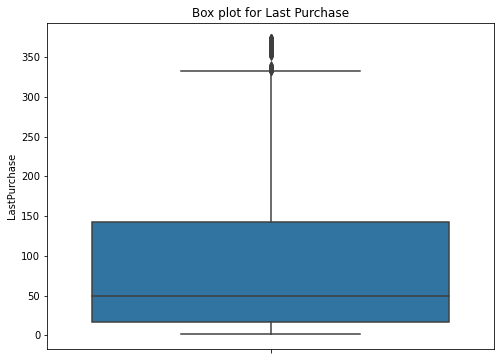

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(y='LastPurchase',data=retail)
plt.title("Box plot for Last Purchase")

**InterquartileRange = retail['LastPurchase'].quantile(0.75)-retail['LastPurchase'].quantile(0.25)**

In [27]:
lowerBoundary_purchase = retail['LastPurchase'].quantile(0.25) - (1.5*(retail['LastPurchase'].quantile(0.75)-retail['LastPurchase'].quantile(0.25)))

In [28]:
UpperBoundary_purchase = retail['LastPurchase'].quantile(0.75) + (1.5*(retail['LastPurchase'].quantile(0.75)-retail['LastPurchase'].quantile(0.25)))

In [29]:
retail = retail[(retail['LastPurchase'] <= UpperBoundary_purchase) & (retail['LastPurchase'] >= lowerBoundary_purchase)]

In [30]:
retail.head()

,CustomerID,LastPurchase,Freq,Totalprice
0,12346,326,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40


Text(0.5, 1.0, 'Box plot for Frequency of Purchase')

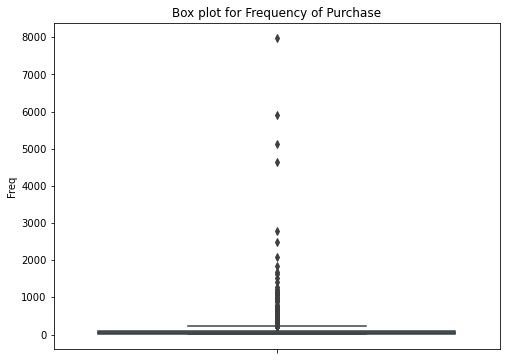

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Freq',data=retail)
plt.title("Box plot for Frequency of Purchase")

In [32]:
lowerBoundary_Freq = retail['Freq'].quantile(0.25) - (1.5*(retail['Freq'].quantile(0.75)-retail['Freq'].quantile(0.25)))

In [33]:
UpperBoundary_Freq = retail['Freq'].quantile(0.75) + (1.5*(retail['Freq'].quantile(0.75)-retail['Freq'].quantile(0.25)))

In [34]:
retail = retail[(retail['Freq'] <= UpperBoundary_Freq) & (retail['Freq'] >= lowerBoundary_Freq)]

In [35]:
retail.head()

,CustomerID,LastPurchase,Freq,Totalprice
0,12346,326,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40


Text(0.5, 1.0, 'Box plot for Total Price')

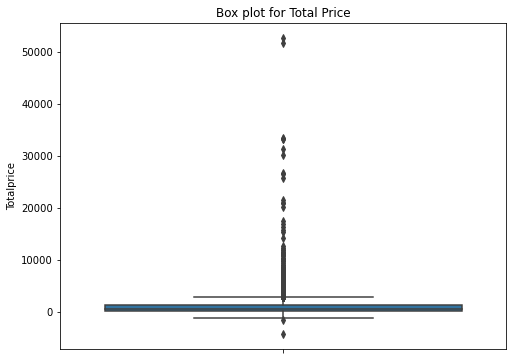

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(y='Totalprice',data=retail)
plt.title("Box plot for Total Price")

In [37]:
lowerBoundary_TP = retail['Totalprice'].quantile(0.25) - (1.5*(retail['Totalprice'].quantile(0.75)-retail['Totalprice'].quantile(0.25)))

In [38]:
UpperBoundary_TP = retail['Totalprice'].quantile(0.75) + (1.5*(retail['Totalprice'].quantile(0.75)-retail['Totalprice'].quantile(0.25)))

In [39]:
retail = retail[(retail['Totalprice'] <= UpperBoundary_TP) & (retail['Totalprice'] >= lowerBoundary_TP)]

In [40]:
retail.head()

,CustomerID,LastPurchase,Freq,Totalprice
0,12346,326,2,0.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40
5,12352,36,95,1545.41


In [41]:
retail.shape

(3537, 4)

In [42]:
retail.reset_index(drop=True,inplace=True)

In [43]:
retail_unscaled = retail.copy()

#### Once all outliers are removed from the original data we can proceed for the K-means clustering

# Scaling the data

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in ['LastPurchase','Freq','Totalprice']:
    retail[[i]] = sc.fit_transform(retail[[i]])

In [45]:
retail.head()

,CustomerID,LastPurchase,Freq,Totalprice
0,12346,2.547800,-1.027424,-1.154439
1,12348,-0.201279,-0.403295,1.616481
2,12349,-0.814619,0.500614,1.555289
3,12350,2.372560,-0.704599,-0.638873
4,12352,-0.628427,0.974091,1.228219


In [46]:
retail.set_index('CustomerID',drop=True,inplace=True)

In [47]:
retail.head()

,LastPurchase,Freq,Totalprice
CustomerID,,,
12346,2.547800,-1.027424,-1.154439
12348,-0.201279,-0.403295,1.616481
12349,-0.814619,0.500614,1.555289
12350,2.372560,-0.704599,-0.638873
12352,-0.628427,0.974091,1.228219


**So, the data preparation is now complete. So, let’s reiterate the steps involved in data preparation:**

$-->$ Missing value treatment

$-->$ Transforming data from Order-level to Customer-level

$-->$ Calculation of RFM values

$-->$ Outlier treatment

$-->$ Standardisation of data

# Model Building

In [48]:
from sklearn.cluster import KMeans

**n_clusters:** The number of clusters to form as well as the number of centroids to generate

**init:** Method for initialization of the cluster centres

**n_init:** Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia (explained below).

**max_iter:** Maximum number of iterations of the k-means algorithm for a single run in case it doesn't converge on its own

In [49]:
cluster = KMeans(n_clusters=3,init='random',n_init=10,max_iter=50).fit(retail)

In [50]:
retail.head()

,LastPurchase,Freq,Totalprice
CustomerID,,,
12346,2.547800,-1.027424,-1.154439
12348,-0.201279,-0.403295,1.616481
12349,-0.814619,0.500614,1.555289
12350,2.372560,-0.704599,-0.638873
12352,-0.628427,0.974091,1.228219


Let's now try to understand the output of the KMeans() function.

**cluster_centers:** Coordinates of cluster centres

**labels:** Labels of each point i.e. the labels to which the points belong

**inertia:** Sum of squared distances of points to their closest cluster centre

https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a

In [51]:
ssd = []
for i in range(1,21,1):
    cluster = KMeans(n_clusters=i,max_iter=50).fit(retail)
    ssd.append(cluster.inertia_)

Text(0, 0.5, 'Inertia')

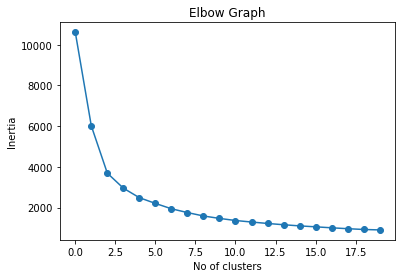

In [52]:
plt.plot(ssd,marker='o')
plt.title("Elbow Graph")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")

Now from the above graph we can now choose a value from 4 to 8 as an optimal K .After 5 there is not much change in the inertial.So we can choose optimal cluster K as 5.

In [62]:
cluster = KMeans(n_clusters=8,max_iter=50,random_state=0,verbose=1).fit(retail)

Initialization complete
Iteration 0, inertia 2425.7232767233004
Iteration 1, inertia 2039.500052911733
Iteration 2, inertia 1955.0779678953982
Iteration 3, inertia 1926.5909377202765
Iteration 4, inertia 1911.5878957849563
Iteration 5, inertia 1897.6255677698664
Iteration 6, inertia 1879.3454429937026
Iteration 7, inertia 1854.9172871931241
Iteration 8, inertia 1837.3581481336366
Iteration 9, inertia 1823.9547535193208
Iteration 10, inertia 1814.705807160041
Iteration 11, inertia 1805.3040368398144
Iteration 12, inertia 1799.520010719491
Iteration 13, inertia 1794.8563575746969
Iteration 14, inertia 1790.2942824013496
Iteration 15, inertia 1786.6073567593276
Iteration 16, inertia 1783.0757053627992
Iteration 17, inertia 1778.4743646020613
Iteration 18, inertia 1774.6580442005052
Iteration 19, inertia 1772.2851498039374
Iteration 20, inertia 1769.7843113412964
Iteration 21, inertia 1767.6404686694075
Iteration 22, inertia 1765.7773726957591
Iteration 23, inertia 1764.598314212852
Iterat

In [63]:
cluster.labels_

array([2, 4, 4, ..., 6, 5, 4])

In [64]:
clusterd_customers = pd.concat([retail_unscaled,pd.Series(cluster.labels_)],axis=1)

In [65]:
clusterd_customers.columns = ['CustomerID', 'LastPurchase', 'Freq', 'Totalprice', 'ClusterLabel']

In [66]:
clusterd_customers.tail()

,CustomerID,LastPurchase,Freq,Totalprice,ClusterLabel
3532,18278,74,9,173.90,5
3533,18280,278,10,180.60,2
3534,18281,181,7,80.82,6
3535,18282,8,13,176.60,5
3536,18287,43,70,1837.28,4


In [67]:
clusterd_customers[['ClusterLabel','Freq']].groupby(by = ['ClusterLabel']).mean().Freq

ClusterLabel
0    162.144330
1     58.481910
2     17.670190
3    132.278008
4     65.670951
5     18.892779
6     19.925214
7     69.964072
Name: Freq, dtype: float64

Text(0.5, 1.0, 'Mean Frequency of Purchase for each cluster')

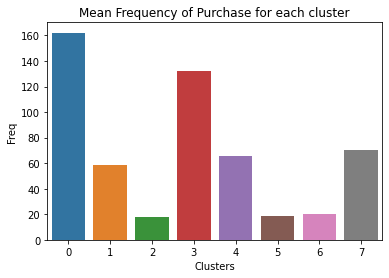

In [68]:
sns.barplot(x=[0,1,2,3,4,5,6,7],y=clusterd_customers[['ClusterLabel','Freq']].groupby(by = ['ClusterLabel']).mean().Freq)
plt.xlabel('Clusters')
plt.title('Mean Frequency of Purchase for each cluster')

Text(0.5, 1.0, 'Mean Last Purchase for each cluster')

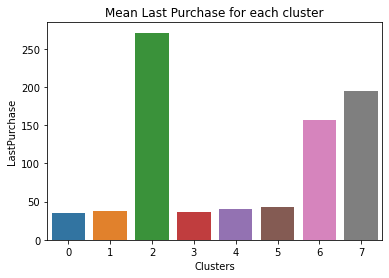

In [69]:
sns.barplot(x=[0,1,2,3,4,5,6,7],y=clusterd_customers[['ClusterLabel','LastPurchase']].groupby(by = ['ClusterLabel']).mean().LastPurchase)
plt.xlabel('Clusters')
plt.title('Mean Last Purchase for each cluster')

Text(0.5, 1.0, 'Mean Totalprice for each cluster')

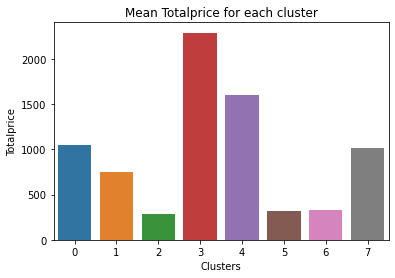

In [70]:
sns.barplot(x=[0,1,2,3,4,5,6,7],y=clusterd_customers[['ClusterLabel','Totalprice']].groupby(by = ['ClusterLabel']).mean().Totalprice)
plt.xlabel('Clusters')
plt.title('Mean Totalprice for each cluster')

# Hierarchial Clustering

In [71]:
retail.head()

,LastPurchase,Freq,Totalprice
CustomerID,,,
12346,2.547800,-1.027424,-1.154439
12348,-0.201279,-0.403295,1.616481
12349,-0.814619,0.500614,1.555289
12350,2.372560,-0.704599,-0.638873
12352,-0.628427,0.974091,1.228219


### Single linkage clustering (min distance)

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree
single_linkage_clustering = linkage(retail,method='single',metric='euclidean')
#dendrogram(single_linkage_clustering)
#plt.show()

### Complete linkage clustering (max distance)

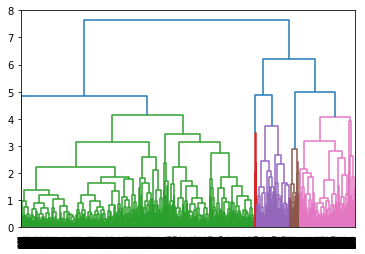

In [87]:
complete_linkage_clustering = linkage(retail,method='complete',metric='euclidean')
dendrogram(complete_linkage_clustering,color_threshold=4.5)
plt.show()

In [90]:
cut_tree(complete_linkage_clustering,n_clusters=5)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [128]:
clustered = pd.concat([retail_unscaled,pd.DataFrame(cut_tree(complete_linkage_clustering,n_clusters=5))],axis = 1)

In [129]:
clustered.columns = ['CustomerId','LastPurchase', 'Freq', 'Totalprice', 'Label']

In [130]:
clustered

,CustomerId,LastPurchase,Freq,Totalprice,Label
0,12346,326,2,0.00,0
1,12348,75,31,1797.24,1
2,12349,19,73,1757.55,1
3,12350,310,17,334.40,0
4,12352,36,95,1545.41,2
...,...,...,...,...,...
3532,18278,74,9,173.90,0
3533,18280,278,10,180.60,0
3534,18281,181,7,80.82,0
3535,18282,8,13,176.60,0


Text(0.5, 1.0, 'Mean Frequency of Purchase for each cluster')

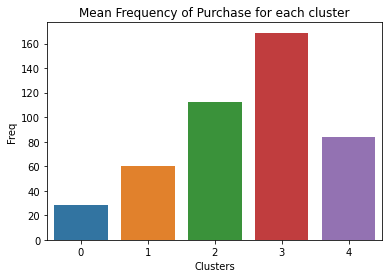

In [131]:
sns.barplot(x=[0,1,2,3,4],y=clustered[['Label','Freq']].groupby(by = ['Label']).mean().Freq)
plt.xlabel('Clusters')
plt.title('Mean Frequency of Purchase for each cluster')

Text(0.5, 1.0, 'Mean LastPurchase for each cluster')

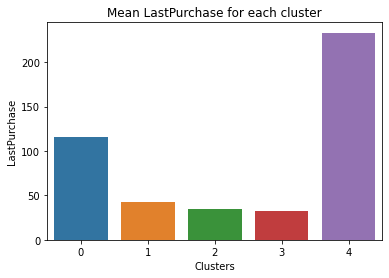

In [132]:
sns.barplot(x=[0,1,2,3,4],y=clustered[['LastPurchase','Label']].groupby(by = ['Label']).mean().LastPurchase)
plt.xlabel('Clusters')
plt.title('Mean LastPurchase for each cluster')

Text(0.5, 1.0, 'Mean Totalprice for each cluster')

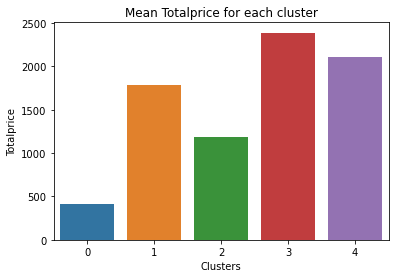

In [133]:
sns.barplot(x=[0,1,2,3,4],y=clustered[['Totalprice','Label']].groupby(by = ['Label']).mean().Totalprice)
plt.xlabel('Clusters')
plt.title('Mean Totalprice for each cluster')